# House Prices prediction

In this notebook I'll try to predict price of the houses using machine learning techniques

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


<a id="description"></a>
# Data description

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density
	
LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access to property

       Grvl	Gravel	
       Pave	Paved
       	
Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access
		
LotShape: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular
       
LandContour: Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression
		
Utilities: Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only	
	
LotConfig: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property
	
LandSlope: Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
	
Neighborhood: Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker
			
Condition1: Proximity to various conditions
	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
Condition2: Proximity to various conditions (if more than one is present)
		
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
BldgType: Type of dwelling
		
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit
	
HouseStyle: Style of dwelling
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level
	
OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
	
OverallCond: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor
		
YearBuilt: Original construction date

YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

RoofStyle: Type of roof

       Flat	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	Hip
       Mansard	Mansard
       Shed	Shed
		
RoofMatl: Roof material

       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles
		
Exterior1st: Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
Exterior2nd: Exterior covering on house (if more than one material)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone
	
MasVnrArea: Masonry veneer area in square feet

ExterQual: Evaluates the quality of the material on the exterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
ExterCond: Evaluates the present condition of the material on the exterior
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
Foundation: Type of foundation
		
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood
		
BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
		
BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
	
BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
	
BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
		
BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

Heating: Type of heating
		
       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace
		
HeatingQC: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
CentralAir: Central air conditioning

       N	No
       Y	Yes
		
Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed
		
1stFlrSF: First Floor square feet
 
2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Bedrooms above grade (does NOT include basement bedrooms)

Kitchen: Kitchens above grade

KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       	
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only
		
Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace
		
GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage
		
GarageYrBlt: Year garage was built
		
GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage
		
GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
PavedDrive: Paved driveway

       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel
		
WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool
		
Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence
	
MiscFeature: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None
		
MiscVal: $Value of miscellaneous feature

MoSold: Month Sold (MM)

YrSold: Year Sold (YYYY)

SaleType: Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other
		
SaleCondition: Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)

# Import libraries 

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

# Datasets preparation

In [4]:
# Load train dataframe
train=pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv")
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train.shape

(1460, 81)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Visualize correlation between numerical variables in "train" dataframe

In [7]:
#plt.figure(figsize=(10,10))
#sns.heatmap(train.corr(), cmap="RdBu")
#plt.title("Correlations Between Variables", size=15)
#plt.show()

In [186]:
important_num_cols = list(train.corr()["SalePrice"][(train.corr()["SalePrice"]>0.30) | (train.corr()["SalePrice"]<-0.30)].index)
cat_cols = ["MSZoning", "Utilities","BldgType","Heating","KitchenQual","SaleCondition","LandSlope"]
important_cols = important_num_cols + cat_cols
train_df = train[important_cols]
train_df.head()

,LotFrontage,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,...,WoodDeckSF,OpenPorchSF,SalePrice,MSZoning,Utilities,BldgType,Heating,KitchenQual,SaleCondition,LandSlope
0,65.0,7,2003,2003,196.0,706,856,856,854,1710,...,0,61,208500,RL,AllPub,1Fam,GasA,Gd,Normal,Gtl
1,80.0,6,1976,1976,0.0,978,1262,1262,0,1262,...,298,0,181500,RL,AllPub,1Fam,GasA,TA,Normal,Gtl
2,68.0,7,2001,2002,162.0,486,920,920,866,1786,...,0,42,223500,RL,AllPub,1Fam,GasA,Gd,Normal,Gtl
3,60.0,7,1915,1970,0.0,216,756,961,756,1717,...,0,35,140000,RL,AllPub,1Fam,GasA,Gd,Abnorml,Gtl
4,84.0,8,2000,2000,350.0,655,1145,1145,1053,2198,...,192,84,250000,RL,AllPub,1Fam,GasA,Gd,Normal,Gtl


In [187]:
#Check for missing values
print(train_df.isna().sum())

print("Total: ",train_df.isna().sum().sum())

LotFrontage      259
OverallQual        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
GrLivArea          0
FullBath           0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
SalePrice          0
MSZoning           0
Utilities          0
BldgType           0
Heating            0
KitchenQual        0
SaleCondition      0
LandSlope          0
dtype: int64
Total:  348


<AxesSubplot:xlabel='SalePrice', ylabel='GarageYrBlt'>

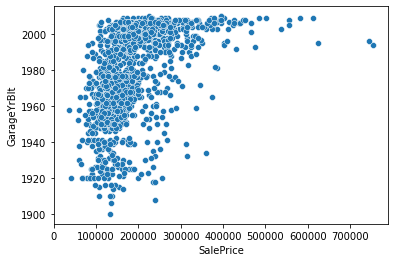

In [188]:
sns.scatterplot(x="SalePrice", y="GarageYrBlt", data=train_df)

In [189]:
train["GarageYrBlt"].describe()

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [190]:
# Convert data from Categorical to numeric type
train_df['GarageYrBlt']=pd.to_numeric(train_df['GarageYrBlt'])

# Replace Nan by '1'
train_df['GarageYrBlt'] = train_df['GarageYrBlt'].fillna(1)

# Define bins borders
bins = [0, 1900, 1950, 1970, 1990, 2010]

# Create list of bined values
group_names = ['No_data', '1900-1949', '1950-1969', '1970-1989', '1990-2010']

# Create new column to DF
train_df['GarageYrBlt'] = pd.cut(train_df['GarageYrBlt'], bins, labels=group_names, include_lowest=True)

train_df['GarageYrBlt'].value_counts()

1990-2010    582
1950-1969    332
1970-1989    277
1900-1949    187
No_data       82
Name: GarageYrBlt, dtype: int64

In [191]:
#train_df.fillna({"GarageYrBlt":"1900-1949"}, inplace=True)
train_df.isna().sum()

LotFrontage      259
OverallQual        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
GrLivArea          0
FullBath           0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt        0
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
SalePrice          0
MSZoning           0
Utilities          0
BldgType           0
Heating            0
KitchenQual        0
SaleCondition      0
LandSlope          0
dtype: int64

In [192]:
train_df["GarageYrBlt"].value_counts()

1990-2010    582
1950-1969    332
1970-1989    277
1900-1949    187
No_data       82
Name: GarageYrBlt, dtype: int64

<AxesSubplot:xlabel='GarageYrBlt', ylabel='SalePrice'>

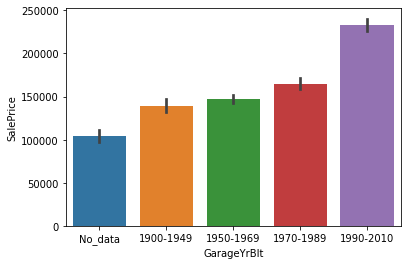

In [193]:
sns.barplot(x=train_df['GarageYrBlt'], y=train_df['SalePrice'], data=train_df)

In [194]:
train_df["LotFrontage"] = train.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
train_df["LotFrontage"].isna().sum()

0

In [195]:
#train_df["MasVnrArea"] = train_df["MasVnrArea"].transform(lambda x: x.fillna(x.median))

In [196]:
train_df.isna().sum()

LotFrontage      0
OverallQual      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       8
BsmtFinSF1       0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
GrLivArea        0
FullBath         0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
SalePrice        0
MSZoning         0
Utilities        0
BldgType         0
Heating          0
KitchenQual      0
SaleCondition    0
LandSlope        0
dtype: int64

In [197]:
# Plot the charts
# sns.pairplot(train_df[important_cols])

Check for vars that strongly correlates to each other

In [198]:
def get_vars_list_with_strong_correlation(dataframe):
    # Function returns list of vars that correlates to each  other with value of correlation
    # coefficien more then 90%
    
    # Create an empty list
    CorField = []
    
    # Count correlation coefficients
    CorrKoef=dataframe.corr()    
    
    # For each column in df
    for column_index in CorrKoef:
        
        # For each var index in filtered df where value more then 90%
        for var_index in CorrKoef.index[CorrKoef[column_index] > 0.9]:
            
            # Check if var index already in list and check for coefficient 
            # for same variable
            if column_index != var_index and var_index not in CorField and column_index not in CorField:
                CorField.append(var_index)
                print ("%s-->%s: r^2=%f" % (column_index,var_index, CorrKoef[column_index][CorrKoef.index==var_index].values[0]))
    return(CorField)   

In [199]:
# Run function and get the list of vars
get_vars_list_with_strong_correlation(train_df)

[]

Transform dataframe to df with dummies

In [200]:
def get_dataframe_with_dummy_vars(df, list_of_columns):
    # Input Dataframe and List of the columns that needs to be turned 
    # into dummy variables and get new dataframe 
    
    # For each column in list
    for column in list_of_columns:
        
        # Get dummies dataframe
        dummy_var_df = pd.get_dummies(df[column])
        
        # Create dataframe with names of new columns
        dummy_df = pd.DataFrame(df[column].value_counts())
        dummy_df.reset_index(inplace=True)
        
        # For each name of the column 
        for index, value in enumerate(dummy_df['index']):
            
            # Get name of the var
            name = dummy_df.iloc[index,0]
            
            # Create new column name
            new_column_name = column + "_" + name 
            
            # Rename column
            dummy_var_df.rename(columns={name:new_column_name}, inplace=True)
        
        # Merge data frame "df" and "dummy df" 
        df = pd.concat([df, dummy_var_df], axis=1)

        # drop original column "fuel-type" from "df"
        df.drop(column, axis = 1, inplace=True)
        
    return(df)
    

In [201]:
train_df.dtypes

LotFrontage       float64
OverallQual         int64
YearBuilt           int64
YearRemodAdd        int64
MasVnrArea        float64
BsmtFinSF1          int64
TotalBsmtSF         int64
1stFlrSF            int64
2ndFlrSF            int64
GrLivArea           int64
FullBath            int64
TotRmsAbvGrd        int64
Fireplaces          int64
GarageYrBlt      category
GarageCars          int64
GarageArea          int64
WoodDeckSF          int64
OpenPorchSF         int64
SalePrice           int64
MSZoning           object
Utilities          object
BldgType           object
Heating            object
KitchenQual        object
SaleCondition      object
LandSlope          object
dtype: object

In [202]:
train_df["MasVnrArea"].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

<AxesSubplot:xlabel='MasVnrArea', ylabel='SalePrice'>

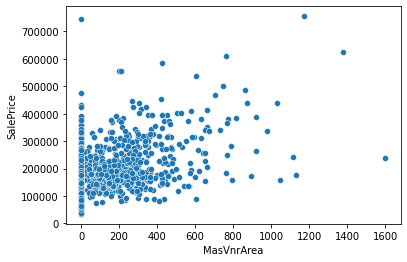

In [203]:
sns.scatterplot(x=train_df["MasVnrArea"], y=train_df["SalePrice"], data=train_df)

In [204]:
# Define bins
bins = np.linspace(min(train_df["MasVnrArea"]), max(train_df["MasVnrArea"]), 9)

# Set group names
g_names = ['0-200', '200-400', '400-600', '600-800', '800-1000', '1000-1200', '1200-1400', '1400-1600']

train_df["MasVnrArea"] = pd.cut(train_df["MasVnrArea"], bins, labels=g_names, include_lowest=True )

train_df["MasVnrArea"].value_counts()

0-200        1154
200-400       198
400-600        61
600-800        25
800-1000        7
1000-1200       5
1200-1400       1
1400-1600       1
Name: MasVnrArea, dtype: int64

<AxesSubplot:xlabel='MasVnrArea', ylabel='SalePrice'>

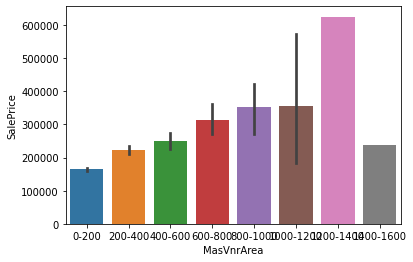

In [205]:
sns.barplot(x=train_df["MasVnrArea"], y=train_df["SalePrice"], data=train_df)

In [206]:
# Get list of columns that are 'object' data type
list_of_cols =  list(train_df.select_dtypes(['object', 'category']).columns)
print(list_of_cols)
#Get df with dummies
train_df_d = get_dataframe_with_dummy_vars(train_df, list_of_cols)

['MasVnrArea', 'GarageYrBlt', 'MSZoning', 'Utilities', 'BldgType', 'Heating', 'KitchenQual', 'SaleCondition', 'LandSlope']


In [207]:
train_df_d.head().T

,0,1,2,3,4
LotFrontage,65.0,80.0,68.0,60.0,84.0
OverallQual,7.0,6.0,7.0,7.0,8.0
YearBuilt,2003.0,1976.0,2001.0,1915.0,2000.0
YearRemodAdd,2003.0,1976.0,2002.0,1970.0,2000.0
BsmtFinSF1,706.0,978.0,486.0,216.0,655.0
...,...,...,...,...,...
SaleCondition_Normal,1.0,1.0,1.0,0.0,1.0
SaleCondition_Partial,0.0,0.0,0.0,0.0,0.0
LandSlope_Gtl,1.0,1.0,1.0,1.0,1.0
LandSlope_Mod,0.0,0.0,0.0,0.0,0.0


<a id="ds"></a>
# Data Standartisation

Split the data into X and y chunks

In [208]:
X = train_df_d.drop("SalePrice", axis=1)

y = train_df_d["SalePrice"]

Standardize only numeric values

In [209]:
important_num_cols.remove("SalePrice")
important_num_cols.remove("MasVnrArea")
important_num_cols.remove("GarageYrBlt")

In [210]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X[important_num_cols] = scaler.fit_transform(X[important_num_cols])

In [211]:
X.head()

,LotFrontage,OverallQual,YearBuilt,YearRemodAdd,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,...,KitchenQual_TA,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev
0,-0.231877,0.651479,1.050994,0.878668,0.575425,-0.459303,-0.793434,1.161852,0.370333,0.789741,...,0,0,0,0,0,1,0,1,0,0
1,0.437043,-0.071836,0.156734,-0.429577,1.171992,0.466465,0.257140,-0.795163,-0.482512,0.789741,...,1,0,0,0,0,1,0,1,0,0
2,-0.098093,0.651479,0.984752,0.830215,0.092907,-0.313369,-0.627826,1.189351,0.515013,0.789741,...,0,0,0,0,0,1,0,1,0,0
3,-0.454850,0.651479,-1.863632,-0.720298,-0.499274,-0.687324,-0.521734,0.937276,0.383659,-1.026041,...,0,1,0,0,0,0,0,1,0,0
4,0.615421,1.374795,0.951632,0.733308,0.463568,0.199680,-0.045611,1.617877,1.299326,0.789741,...,0,0,0,0,0,1,0,1,0,0


Train test split

In [212]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<a id="MLM"></a>
# Machine learing models

Define functions

In [213]:
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)).mean()
    return rmse

def evaluation(y, predictions):
    "Function Counts evaluation errors"

    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r_squared = r2_score(y, predictions)
    return mae, mse, rmse, r_squared

def run_ml_and_get_performance_results(models_list):
    # Create dataframe
    models = pd.DataFrame(columns=["Model", "MAE", "MSE", "RMSE", "R2 Score", "RMSE (Cross-Validation)"])
    # For each model in list
    for model in models_list:
        print("-"*30)
        str_model = str(model)
        print("Model ", str_model, " Started")
        
        # Check for Linear model
        if "Polynomial" in str_model:
            X_train_d = model.fit_transform(X_train)
            X_test_d = model.transform(X_test)

            lin_reg = LinearRegression()
            lin_reg.fit(X_train_d, y_train)
            predictions = lin_reg.predict(X_test_d)
            # Get coefficients
            mae, mse, rmse, r_squared = evaluation(y_test, predictions)       
            rmse_cross_val = rmse_cv(lin_reg)
            
        else: 
            # Fit model
            model.fit(X_train, y_train)
            # Get predictions on test data
            predictions = model.predict(X_test)
            # Get coefficients
            mae, mse, rmse, r_squared = evaluation(y_test, predictions)       
            rmse_cross_val = rmse_cv(model)
        
        print("MAE:", mae)
        print("MSE:", mse)
        print("RMSE:", rmse)
        print("R2 Score:", r_squared)
        print("-"*30)
        print("RMSE Cross-Validation:", rmse_cross_val)
        
        # Add new row to df
        new_row = {"Model": str_model[0:10],"MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
        models = models.append(new_row, ignore_index=True)
    
    return models
    

In [214]:
# Import requred libraries
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.metrics import mean_squared_error

# Create List for tests
models_list = [Ridge(), 
               Lasso(),
               ElasticNet(),
               SVR(C=100000),
               RandomForestRegressor(n_estimators=100),
               XGBRegressor(n_estimators=1000, learning_rate=0.01),
               PolynomialFeatures(degree=2)
               ]

results = run_ml_and_get_performance_results(models_list)

------------------------------
Model  Ridge()  Started
MAE: 22606.059934893816
MSE: 1309278571.2651732
RMSE: 36183.95461064439
R2 Score: 0.8293060117784333
------------------------------
RMSE Cross-Validation: 35614.419237946626
------------------------------
Model  Lasso()  Started
MAE: 22862.581490394266
MSE: 1327001887.00181
RMSE: 36428.03710058792
R2 Score: 0.8269953778812686
------------------------------
RMSE Cross-Validation: 36038.320454781955
------------------------------
Model  ElasticNet()  Started
MAE: 22297.27253344446
MSE: 1536211772.7639716
RMSE: 39194.5375373147
R2 Score: 0.7997201512336548
------------------------------
RMSE Cross-Validation: 36832.93595373031
------------------------------
Model  SVR(C=100000)  Started
MAE: 17237.29201307822
MSE: 1059642041.1924161
RMSE: 32552.143419326723
R2 Score: 0.8618517632014754
------------------------------
RMSE Cross-Validation: 29821.97843720208
------------------------------
Model  RandomForestRegressor()  Started
MAE: 180

In [215]:
results.sort_values(by="RMSE (Cross-Validation)")

,Model,MAE,MSE,RMSE,R2 Score,RMSE (Cross-Validation)
5,XGBRegress,1.740403e+04,8.533740e+08,2.921257e+04,8.887435e-01,2.832573e+04
3,SVR(C=1000,1.723729e+04,1.059642e+09,3.255214e+04,8.618518e-01,2.982198e+04
4,RandomFore,1.802637e+04,8.299401e+08,2.880868e+04,8.917986e-01,2.984704e+04
0,Ridge(),2.260606e+04,1.309279e+09,3.618395e+04,8.293060e-01,3.561442e+04
1,Lasso(),2.286258e+04,1.327002e+09,3.642804e+04,8.269954e-01,3.603832e+04
2,ElasticNet,2.229727e+04,1.536212e+09,3.919454e+04,7.997202e-01,3.683294e+04
6,Polynomial,6.462501e+14,1.230089e+31,3.507263e+15,-1.603699e+21,2.067369e+13


<function matplotlib.pyplot.show(close=None, block=None)>

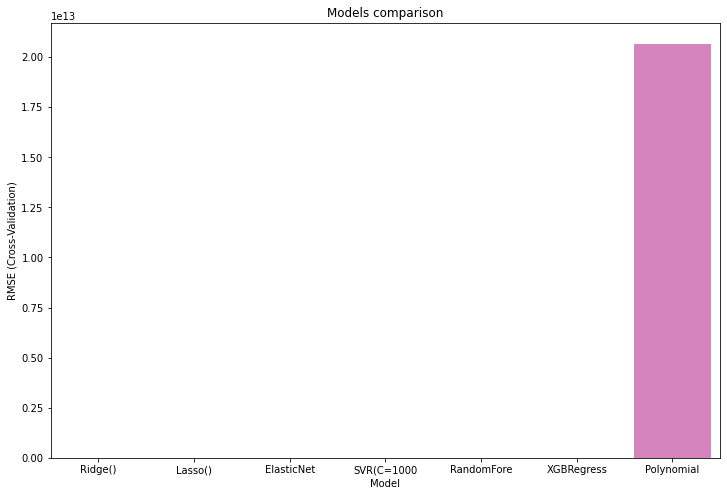

In [216]:
plt.figure(figsize=(12,8))
sns.barplot(x=results["Model"], y=results["RMSE (Cross-Validation)"])
plt.title("Models comparison")
plt.show

# Price prediction
When we choosed the model, let's predict prices. Start from dataframe preparation

In [ ]:
test = pd.read_csv("../input/house-prices-advanced-regression-techniques/test.csv")
test.info()

In [ ]:
# Create test dataframe with needed columns
important_cols = important_num_cols + cat_cols
test_df = test[important_cols]
test_df.head()

In [ ]:
#Check for missing values
print(test_df.isna().sum())

print("Total: ",test_df.isna().sum().sum())

In [ ]:
test_df.dtypes

In [ ]:
# Replace numeric column's Nan values by mean
test_df['TotalBsmtSF'] = test_df['TotalBsmtSF'].transform(lambda x: x.fillna(x.median()))
test_df['GarageCars'] = test_df['GarageCars'].transform(lambda x: x.fillna(x.median()))
test_df['GarageArea'] = test_df['GarageArea'].transform(lambda x: x.fillna(x.median()))

In [ ]:
# Explore object type columns with Nan values
print("\nMSZoning\n", test_df["MSZoning"].value_counts())
print("\nUtilities\n", test_df["Utilities"].value_counts())
print("\nKitchenQual\n", test_df["KitchenQual"].value_counts())

In [ ]:
# Replace NaN by most frequent values
test_df['MSZoning'] = test_df['MSZoning'].transform(lambda x: x.fillna("RL"))
test_df['Utilities'] = test_df['Utilities'].transform(lambda x: x.fillna("AllPub"))
test_df['KitchenQual'] = test_df['KitchenQual'].transform(lambda x: x.fillna("TA"))

test_df.isna().sum()

In [ ]:
# Get list of columns that are 'object' data type
list_of_cols =  list(test_df.select_dtypes(['object']).columns)
print(list_of_cols)
#Get df with dummies
test_df_d = get_dataframe_with_dummy_vars(test_df, list_of_cols)

In [ ]:
test_df_d.head().T

In [ ]:
#train_df_d.shape
test_df_d.shape

In [ ]:
#Check for missing columns
train_cols = train_df_d.columns
test_cols = test_df_d.columns

common_cols = train_cols.intersection(test_cols)
train_not_test = train_cols.difference(test_cols)

print("Train not test", train_not_test)

In [ ]:
# Add missing columns with 0 value
test_df_d['Heating_Floor'] = 0
test_df_d['Heating_OthW'] = 0
test_df_d['Utilities_NoSeWa'] = 0

In [ ]:
# Normalize test dataframe
test_df_d[important_num_cols] = scaler.fit_transform(test_df_d[important_num_cols])

In [ ]:
# Set the model
xgb = XGBRegressor(n_estimators=1000, learning_rate=0.01)

# Fit the model on all train data (befor split)
xgb.fit(X, y)
#predictions = xgb.predict(X_test)
 

In [ ]:
# Make prediction
predictions = xgb.predict(test_df_d)
predictions

# Export results
Submission = pd.DataFrame({ 'Id': test['Id'], 'SalePrice': predictions })

In [ ]:
#Export csv file
Submission.to_csv('submission.csv', index=False)